In [ ]:
!pip install transformers

In [ ]:
!pip freeze > requirement.txt

In [ ]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")



# conditional image captioning
text = "a photography of"
inputs = processor(raw_image, text, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

# unconditional image captioning
inputs = processor(raw_image, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

a photography of a woman and her dog on the beach
woman sitting on the beach with her dog and a cell phone


In [ ]:
import requests
from PIL import Image

In [ ]:
# unconditional image captioning
inputs = processor(image, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1369: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


a cartoon drawing of two dinosaurs sitting around a campfire


In [ ]:
image2 = Image.open(requests.get('https://images.prov.vic.gov.au/loris/58%2F23%2F7C%2F38%2F-5613-11EB-BE8C-27052853D7D8%2Fimages%2F1%2Ffiles%2F14517-00028-J0596.tif/full/!1000,1000/0/default.jpg', stream=True).raw).convert('RGB')

In [ ]:
# unconditional image captioning
inputs = processor(image2, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

there are two plates of cookies and a plate of cookies on a table


In [ ]:
# conditional image captioning
text = ""
inputs = processor(image2, text, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

there are three deer standing in a field near a shed


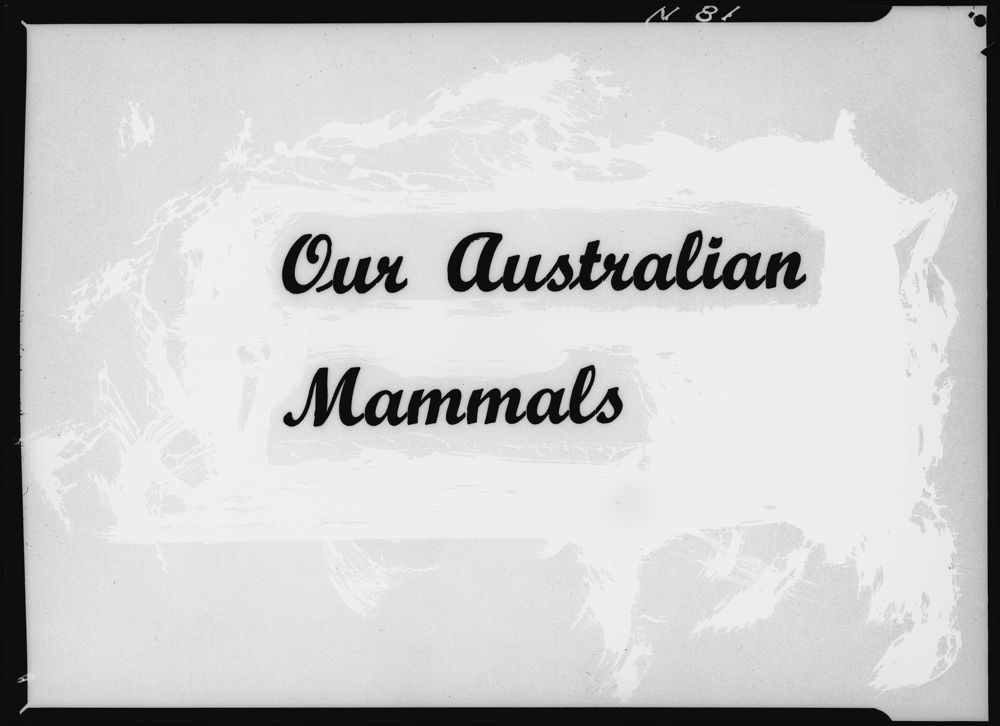

In [ ]:
image2

In [ ]:
import json

In [ ]:
with open('/content/14517_100.json', 'r') as file:
    data = json.load(file)

In [ ]:
len(data)

43

In [ ]:
data[0].keys()

dict_keys(['link', 'description'])

In [ ]:
data[1]['description']

'Subject : Filmstrips - V.E.C.'

In [ ]:
data[0]['link']

'https://images.prov.vic.gov.au/loris/00%2F49%2F39%2F2D%2F-5616-11EB-BE8C-1319C46AF80B%2Fimages%2F1%2Ffiles%2F14517-00053-U0115.tif/full/!1000,1000/0/default.jpg'

In [ ]:
for i in data:
  print(i['description'])


Subject : Zoo Animals
Subject : Filmstrips - V.E.C.
Subject : Zoo Animals
Subject : Filmstrips - V.E.C.
Subject : Zoo Animals
Subject : GRASSES
Subject : Zoo Animals
Subject : GRASSES
Subject : Wildflowers
Subject : Zoo Animals
Subject : POSSUMS
Subject : Zoo Animals
Subject : Wildflowers
Subject : Zoo Animals
Subject : Zoo Animals
Subject : Seashores
Subject : Zoo Animals
Subject : BIRDS
Subject : BIRDS
Subject : Zoo Animals
Subject : Birds
Subject : Zoo Animals
Subject : St Arnaud Technical School
Subject : SHELLS
Subject : Zoo Animals
Subject : SHELLS
Subject : CHARTS-VEC
Subject : CHARTS-VEC
Subject : Zoo Animals
Subject : Australia - History 1835-1851
Subject : Zoo Animals
Subject : Zoo Animals
Subject : Australia History
Subject : Zoo Animals
Subject : Australia History
Subject : CLASSROOM PICTURES - V.E.C.
Subject : England History
Subject : Australia History
Subject : Australia History
Subject : Australia History
Subject : COAL AND COAL MINING  AUSTRALIA
Subject : MAPS AND CHAR

In [ ]:
from transformers import pipeline

# Step 1: Generate caption using BLIP (as you did in your code)
caption = processor.decode(out[0], skip_special_tokens=True)

# Step 2: Use a text-based QA model to answer questions based on the caption
qa_pipeline = pipeline("question-answering")


No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


arafed


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


In [ ]:
question = "Summarise in one word"  # Example question
context = "there are three deer standing in a field near a shed"  # Using the caption as the context

answer = qa_pipeline({"question": question, "context": context})

print(answer['answer'])

there are three deer standing in a field near a shed


In [ ]:
# Load the model
with open('blip_model_zero.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Load the processor
with open('blip_processor_zero.pkl', 'rb') as f:
    loaded_processor = pickle.load(f)

In [ ]:
inputs = loaded_processor(image2, return_tensors="pt")

out = loaded_model.generate(**inputs)
print(loaded_processor .decode(out[0], skip_special_tokens=True))

there are three deer standing in a field near a shed
